In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import json
from src import preparedata
from src import modelarea
from src import trainarea

import seaborn as sns 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto
params=json.load(open('params/params.json','r'))

2023-02-20 16:37:50.945456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 16:37:52.194476: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-20 16:37:53.063794: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-20 16:38:01.281648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [11]:
dataset=preparedata.readGPDData(params['dataprepinargs'])
dataset.preparedata()

  0%|          | 0/31 [00:00<?, ?it/s]

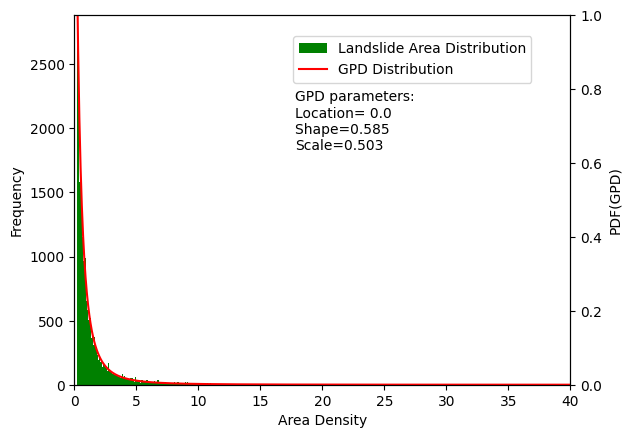

In [125]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.hist(dataset.Y_train.flatten(),color='green',bins=np.arange(0.2, 40.0 + 0.1, 0.1), label='Landslide Area Distribution')
ax2.plot(np.arange(start=0.2,stop=40.0,step=0.1),gpto.prob(np.arange(start=0.2,stop=40.0,step=0.1)),color='red',label='GPD Distribution')
plt.ylim(0.0,1)
plt.xlim(0.0,40)
fig.legend(bbox_to_anchor=(0.85,0.85))
fig.text(0.47,0.60,'GPD parameters: \nLocation= 0.0 \nShape=0.585 \nScale=0.503')
ax1.set_xlabel('Area Density')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('PDF(GPD)')
plt.savefig('Data/Plots/distributions.pdf', dpi=300)
plt.show()


In [46]:
import tensorflow_probability as tfp


gpto=tfp.distributions.GeneralizedPareto(
    loc=0.01,
    scale=0.5039473874727983,
    concentration=0.5856400905176868)

In [2]:
# plot rainfall data

In [3]:
design_precp=pd.read_csv('Data/DesignRainfall/ExtractedDesignRainfall.csv')

In [4]:
cl_data=pd.read_csv('Data/ClimateProjections/NepalClimateProjection/clim_rps.csv')

In [5]:
cl_cols=[col for col in cl_data.columns if '_rcp85_bcc' in col]

cl_cols2=[col for col in cl_data.columns if '_rcp45_bcc' in col]


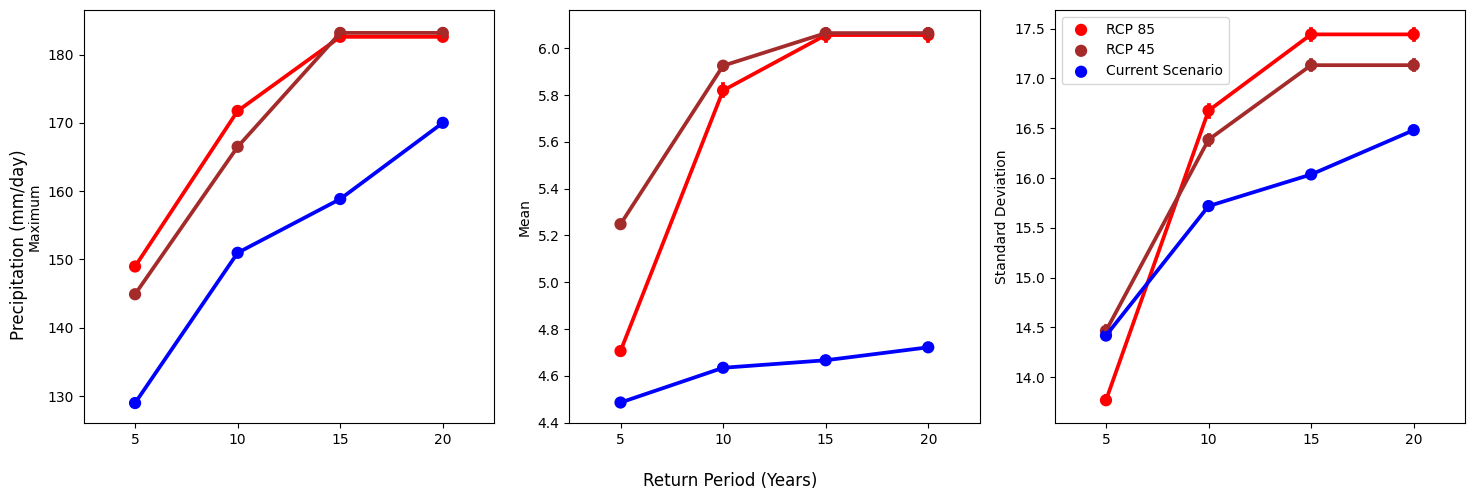

In [23]:
import matplotlib.ticker as ticker
f, axs = plt.subplots(1, 3, sharey=False,sharex=False,figsize=(15, 5))
f.supxlabel('Return Period (Years)')
f.supylabel('Precipitation (mm/day)')
sns.pointplot(x="variable", y="value", data=pd.melt(cl_data[[col for col in cl_cols if 'mx_' in col]]),color='red',ax=axs[0])
sns.pointplot(x="variable", y="value", data=pd.melt(cl_data[[col for col in cl_cols2 if 'mx_' in col]]),color='brown',ax=axs[0])
sns.pointplot(x="variable", y="value", data=pd.melt(design_precp[[col for col in design_precp.columns if 'mx_design' in col]]),color='blue',ax=axs[0])
sns.pointplot(x="variable", y="value", data=pd.melt(cl_data[[col for col in cl_cols if 'me_' in col]]),color='red',ax=axs[1])
sns.pointplot(x="variable", y="value", data=pd.melt(cl_data[[col for col in cl_cols2 if 'me_' in col]]),color='brown',ax=axs[1])
sns.pointplot(x="variable", y="value", data=pd.melt(design_precp[[col for col in design_precp.columns if 'me_design' in col]]),color='blue',ax=axs[1])
sns.pointplot(x="variable", y="value", data=pd.melt(cl_data[[col for col in cl_cols if 'st_' in col]]),color='red',ax=axs[2],label='RCP 85')
sns.pointplot(x="variable", y="value", data=pd.melt(cl_data[[col for col in cl_cols2 if 'st_' in col]]),color='brown',ax=axs[2],label='RCP 45')
sns.pointplot(x="variable", y="value", data=pd.melt(design_precp[[col for col in design_precp.columns if 'st_design' in col]]),color='blue',ax=axs[2],label='Current Scenario')
axs[0].set_xlabel('')
axs[0].set_ylabel('Maximum')
axs[1].set_xlabel('')
axs[1].set_ylabel('Mean')
axs[2].set_xlabel('')
axs[2].set_ylabel('Standard Deviation')
axs[0].set_xticklabels([5,10,15,20])
axs[1].set_xticklabels([5,10,15,20])
axs[2].set_xticklabels([5,10,15,20])

# axs[2].legend()
plt.legend()
plt.tight_layout()
plt.savefig('Data/Plots/precipitation.pdf',dpi=500)
plt.savefig('Data/Plots/precipitation.png',dpi=500)
plt.show()
